# Activity: Evaluate simple linear regression
### Introduction

In this activity, I will use simple linear regression to explore the relationship between two continuous variables. To accomplish this, I will perform a complete simple linear regression analysis, which includes creating and fitting a model, checking model assumptions, analyzing model performance, interpreting model coefficients, and communicating results to stakeholders.

For this activity, I'm part of an analytics team that provides insights about marketing and sales. You have been assigned to a project that focuses on the use of influencer marketing, and **I would like to explore the relationship between marketing promotional budgets and sales**. The dataset provided includes information about marketing campaigns across TV, radio, and social media, as well as how much revenue in sales was generated from these campaigns. Based on this information, leaders in your company will make decisions about where to focus future marketing efforts, so it is critical to have a clear understanding of the relationship between the different types of marketing and the revenue they generate.

In [1]:
# Import Libraries

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as ols

In [8]:
# Load the data set

folder_path = os.path.join(os.getcwd(),'raw_data')
file_path = os.path.join(folder_path,'marketing_and_sales_data_evaluate_lr.csv')

mktg_raw = pd.read_csv(file_path)
mktg_raw.head()

,TV,Radio,Social_Media,Sales
0,16.0,6.566231,2.907983,54.732757
1,13.0,9.237765,2.409567,46.677897
2,41.0,15.886446,2.913410,150.177829
3,83.0,30.020028,6.922304,298.246340
4,15.0,8.437408,1.405998,56.594181


In [ ]:
# Explore the data size
mktg_raw.shape

(4572, 4)

In [13]:
# Explore the variables
mktg_raw.describe().round(2)

,TV,Radio,Social_Media,Sales
count,4562.00,4568.00,4566.00,4566.00
mean,54.07,18.16,3.32,192.47
std,26.13,9.68,2.21,93.13
min,10.00,0.00,0.00,31.20
25%,32.00,10.53,1.53,112.32
50%,53.00,17.86,3.06,189.23
75%,77.00,25.65,4.81,272.51
max,100.00,48.87,13.98,364.08


In [12]:
# Explore the variables
mktg_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social_Media  4566 non-null   float64
 3   Sales         4566 non-null   float64
dtypes: float64(4)
memory usage: 143.0 KB


The features in the data are:

* TV promotion budget (in millions of dollars)
*  Social media promotion budget (in millions of dollars)
* Radio promotion budget (in millions of dollars)
* Sales (in millions of dollars)

In [14]:
# Check NA's in the data

mktg_raw.isna().sum()

TV              10
Radio            4
Social_Media     6
Sales            6
dtype: int64

In [21]:
# Calculate the average missing rate in the sales column.

missing_sales = mktg_raw["Sales"].isna().mean()
print(missing_sales)

# Another way for find the missing rate is to divide
# number of missing rows / total rows

missing_sales_r = mktg_raw["Sales"].isna().sum()
total_rows = mktg_raw.shape[0]

missing_rate = missing_sales_r/total_rows

print(missing_rate)

0.0013123359580052493
0.0013123359580052493


In [ ]:
# Check the missing rate as a percentage 
missing_rate= round(missing_rate*100 , 2)
print(f"For the sales column, the missing rate is: {missing_rate}%")

For the sales column, the missing rate is: 0.13%


In [26]:
# Since there are not too many missing rows from the sales column
# I will drop those columns with missing sales

mktg = mktg_raw.dropna(subset="Sales").reset_index(drop=True)

<Axes: xlabel='Sales', ylabel='Count'>

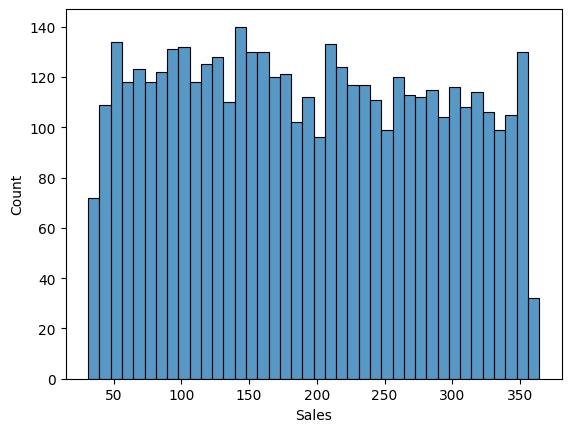

In [29]:
# Visualize the sales distribution
sns.histplot(
    data=mktg,
    x="Sales",
    bins = 40
)

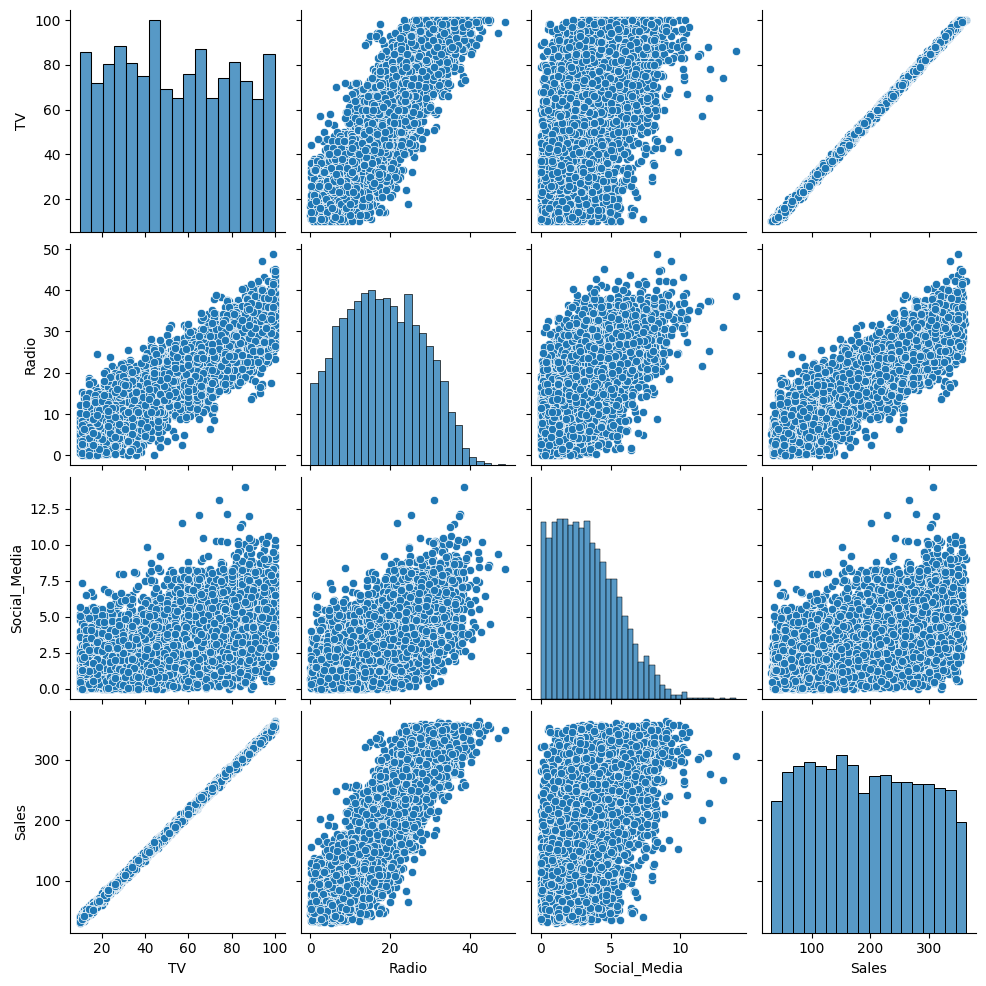

In [30]:
#Visualize the sales vs other columns

sns.pairplot(
    data= mktg
)

In [37]:
# Radio and TV looks like they have a liner corelation between 
# Will build a model on TV

tv_model = ols.ols(data=mktg,formula="Sales ~ TV").fit()
radio_model = ols.ols(data=mktg, formula="Sales ~ Radio").fit()


In [38]:
radio_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                 1.408e+04
Date:                Tue, 18 Nov 2025   Prob (F-statistic):               0.00
Time:                        17:24:32   Log-Likelihood:                -23943.
No. Observations:                4562   AIC:                         4.789e+04
Df Residuals:                    4560   BIC:                         4.790e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.5577      1.450     27.962      0.000      37.714      43.401
Radio          8.3640      0.070    118.652      0.000       8.226       8.502
==============================================================================
Omnibus:                        0.281   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.869   Jarque-Bera (JB):                0.235
Skew:                          -0.006   Prob(JB):                        0.889
Kurtosis:                       3.033   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
tv_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Tue, 18 Nov 2025   Prob (F-statistic):               0.00
Time:                        17:24:35   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.209      -0.323       0.071
TV             3.5614      0.002   2127.776      0.000       3.558       3.565
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.030
Skew:                           0.001   Prob(JB):                        0.985
Kurtosis:                       3.012   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# According to the model builded the function that describies the models are: 

print(f"Sales = ({radio_model.params["Radio"]:.2f} *Radio mm_dolars) + {radio_model.params["Intercept"]:.2f}")
print(f"Sales = ({tv_model.params["TV"]:.2f} *TV mm_dolars) {tv_model.params["Intercept"]:.2f}")

Sales = (8.36 *Radio mm_dolars) + 40.56
Sales = (3.56 *TV mm_dolars) -0.13


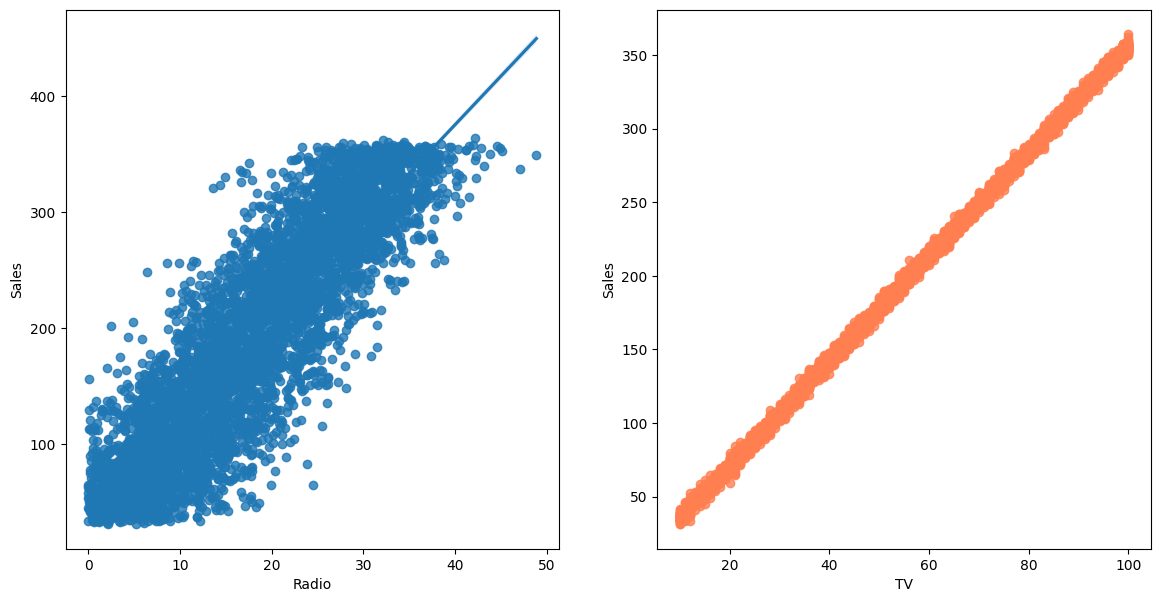

In [ ]:
# Model assumption: Linearity

fig , axes =  plt.subplots(1,2,figsize=(14,7))

sns.regplot(
    data=mktg,
    x= "Radio",
    y = "Sales",
    ax= axes[0]
)

sns.regplot(
    data=mktg,
    x= "TV",
    y = "Sales",
    ax= axes[1],
    color = "Coral"
)

plt.show()

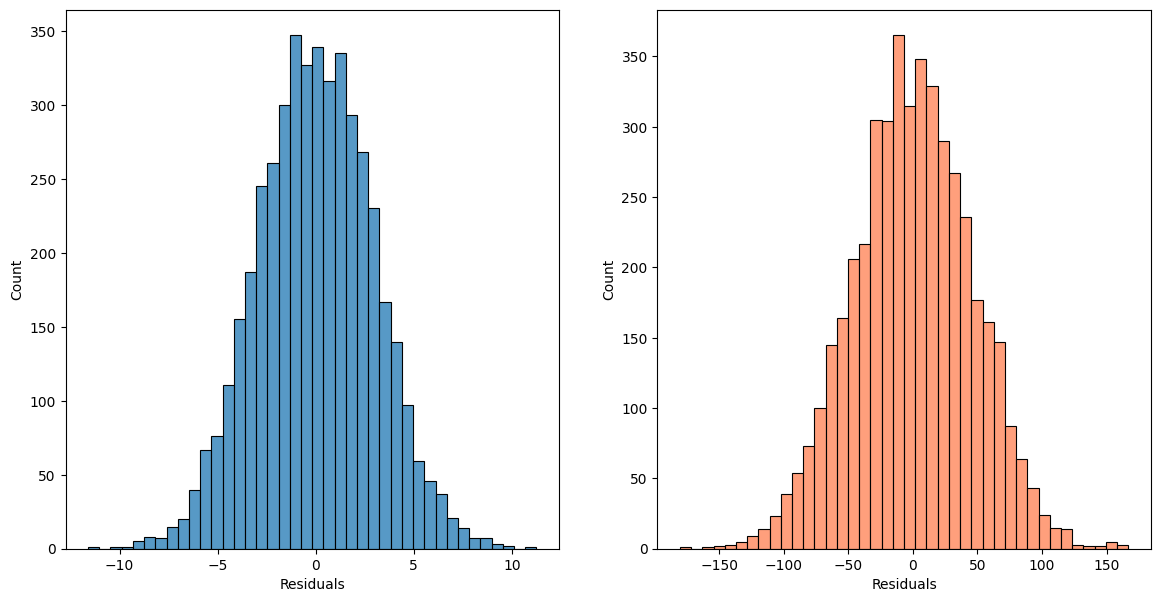

In [62]:
# Model assumption: Normality
## Plot 1: Histogram of the residuals
## Plot 2: Q-Q plot of the residuals

## Table for TV
tv_regression = mktg.loc[:,["TV","Sales"]]
tv_regression["Predictions"] = tv_model.predict(mktg["TV"])
tv_regression["Residuals"] = tv_model.resid

## Table for Radio
radio_regression = mktg.loc[:,["Radio","Sales"]]
radio_regression["Predictions"] = radio_model.predict(mktg["Radio"])
radio_regression["Residuals"] = radio_model.resid

## Plot 1:
fig, axes = plt.subplots(1,2,figsize = (14,7))

sns.histplot(
    data = tv_regression,
    x="Residuals",
    bins=40,
    ax = axes[0]
)

sns.histplot(
    data = radio_regression,
    x= "Residuals",
    bins= 40,
    color = "Coral",
    ax = axes[1]
)

plt.show()

c:\Users\andre\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\graphics\gofplots.py:1041: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


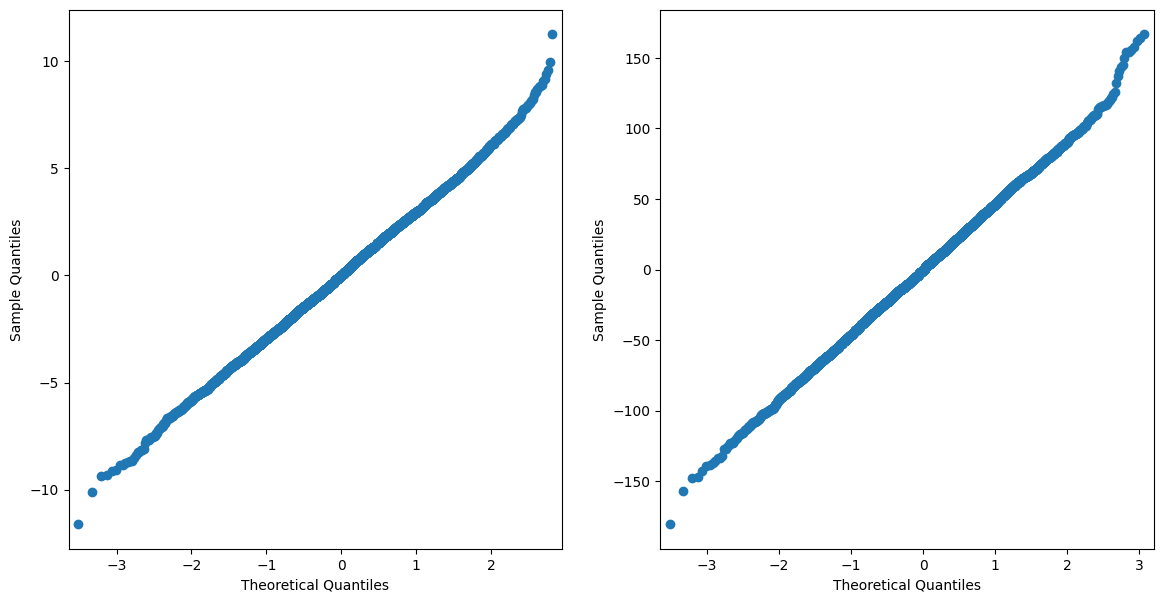

In [66]:
# Model assumption: Normality
## Q-Q plot

fig, axes = plt.subplots(1,2,figsize = (14,7))

sm.qqplot( 
    tv_regression["Residuals"],
    line ="s",
    ax = axes[0]
)

sm.qqplot(
    radio_regression["Residuals"],
    color = "Coral",
    line= "s",
    ax = axes[1]
)

plt.show()

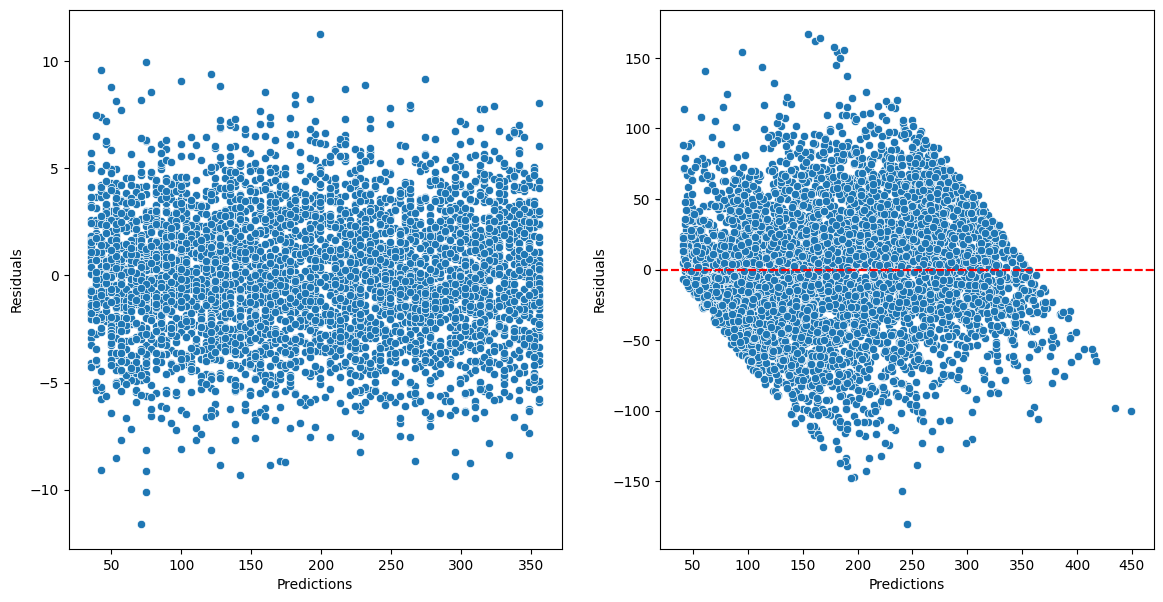

In [72]:
# Model assumption: Homoscedasticity

fig, axes = plt.subplots(1,2,figsize=(14,7))

sns.scatterplot(
    data= tv_regression,
    x = "Predictions",
    y = "Residuals",
    ax = axes[0]
)

plt.axhline(
    y = 0,
    color = "red",
    linestyle = "--",
)

sns.scatterplot(
    data= radio_regression,
    x = "Predictions",
    y = "Residuals",
    ax = axes[1]
)

plt.axhline(
    y = 0,
    color = "red",
    linestyle = "--"
)

plt.show()